<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M1L1_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracting Features from Text**

Importing Libraries

In [1]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

  Preparing metadata (setup.py) ... done


Extracting Features from Text

In [7]:
topic1 = "French Revolution"
topic2 = "Révolution française"
# Set language to English and fetch content
wikipedia.set_lang("en")
eng_content = wikipedia.page(topic1).content

# Set language to French and fetch content
wikipedia.set_lang("fr")
fr_content = wikipedia.page(topic2).content



In [8]:
eng_content[:500]

'The French Revolution was a period of political and societal change in France that began with the Estates General of 1789, and ended with the coup of 18 Brumaire in November 1799 and the formation of the French Consulate. Many of its ideas are considered fundamental principles of liberal democracy, while its values and institutions remain central to modern French political discourse.\nIts causes are generally agreed to be a combination of social, political, and economic factors, which the Ancien '

In [9]:
fr_content[:500]

"La Révolution française (1789-1799) est une période de bouleversements politiques et sociaux en France et dans ses colonies, ainsi qu'en Europe à la fin du XVIIIe siècle. Traditionnellement, on la fait commencer à l'ouverture des États généraux le 5 mai 1789 et finir au coup d'État de Napoléon Bonaparte le 9 novembre 1799 (18 brumaire de l'an VIII). En ce qui concerne l'histoire de France, elle met fin à l'Ancien Régime, notamment à la monarchie absolue remplacée par la monarchie constitutionnel"

Cleaning the Text

In [10]:
def cleanup(text):
    text = text.lower()  # make it lowercase
    text = re.sub(
        r"[^a-z\s]", "", text
    )  # only keep characters in a-z range and whitespaces
    return text

In [11]:
eng_content = cleanup(eng_content)
fr_content = cleanup(fr_content)

In [12]:
eng_content[:500]

'the french revolution was a period of political and societal change in france that began with the estates general of  and ended with the coup of  brumaire in november  and the formation of the french consulate many of its ideas are considered fundamental principles of liberal democracy while its values and institutions remain central to modern french political discourse\nits causes are generally agreed to be a combination of social political and economic factors which the ancien rgime proved unab'

In [13]:
fr_content[:500]

'la rvolution franaise  est une priode de bouleversements politiques et sociaux en france et dans ses colonies ainsi quen europe  la fin du xviiie sicle traditionnellement on la fait commencer  louverture des tats gnraux le  mai  et finir au coup dtat de napolon bonaparte le  novembre   brumaire de lan viii en ce qui concerne lhistoire de france elle met fin  lancien rgime notamment  la monarchie absolue remplace par la monarchie constitutionnelle  puis par la premire rpublique\n mythe national  l'

Calculating Frequency of N-grams

In [14]:
def tuple2string(tup):
    st = ""
    for ii in tup:
        st = st + ii
    return st


def key2string(keys):
    return [tuple2string(i) for i in keys]


def get_ngram_freq(ngram):
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

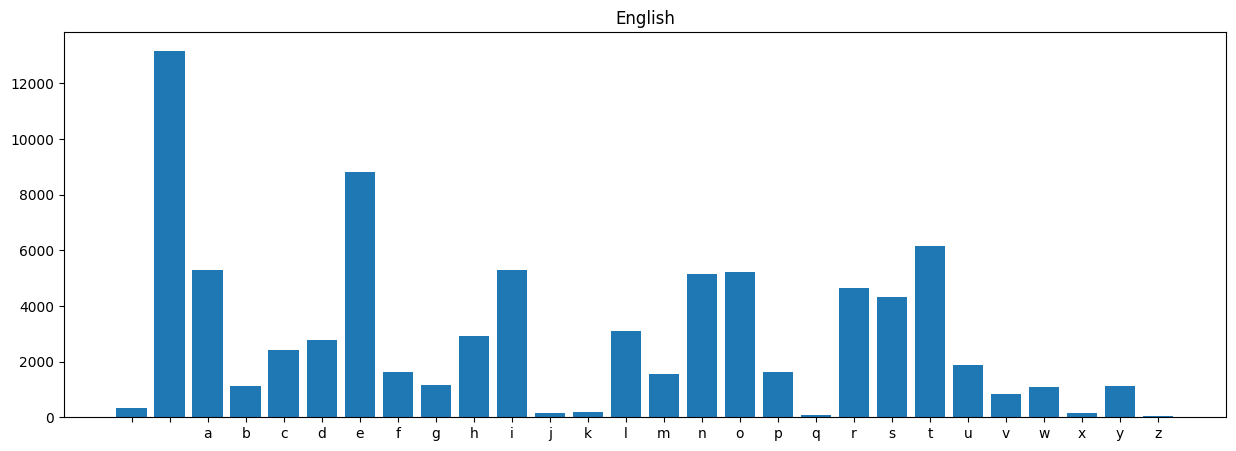

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
unigram_eng = Counter(ngrams(eng_content, 1))
keys, values = get_ngram_freq(unigram_eng)
axs.bar(keys, values)
axs.set_title("English")
plt.show()

Text(0.5, 1.0, 'French')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


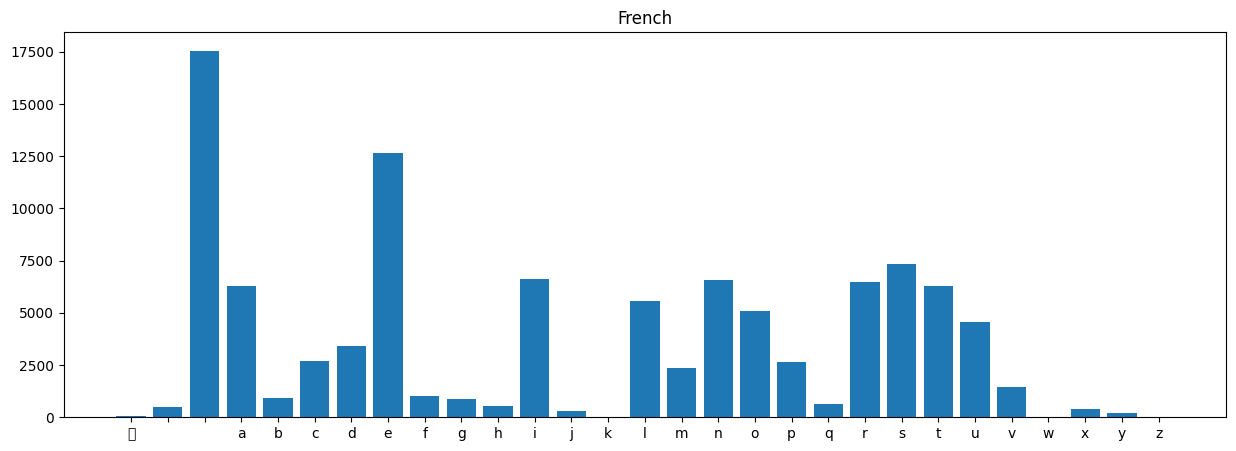

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
unigram_fr = Counter(ngrams(fr_content, 1))
keys, values = get_ngram_freq(unigram_fr)
axs.bar(keys, values)
axs.set_title("French")

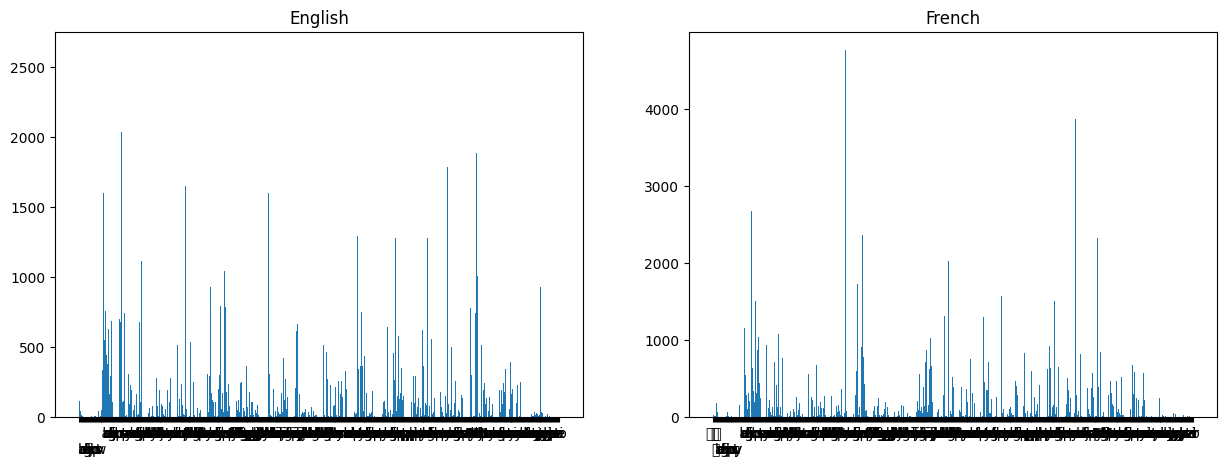

In [31]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
bigram_eng = Counter(ngrams(eng_content, 2))
keys, values = get_ngram_freq(bigram_eng)
axs[0].bar(keys, values)
axs[0].set_title("English")

bigram_fr = Counter(ngrams(fr_content, 2))
keys, values = get_ngram_freq(bigram_fr)
axs[1].bar(keys, values)
axs[1].set_title("French")

plt.show()

In [32]:
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

Text(0.5, 1.0, 'French')

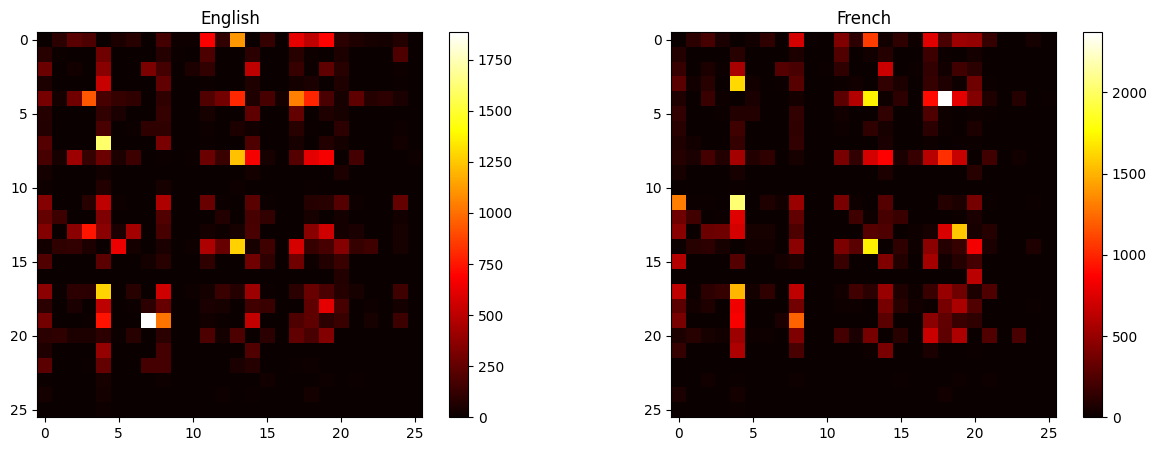

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

bigram_eng_freq = get_2D_ngram_freq(bigram_eng)
fig.colorbar(axs[0].imshow(bigram_eng_freq, cmap="hot"), ax=axs[0])
axs[0].set_title("English")

bigram_fr_freq = get_2D_ngram_freq(bigram_fr)
fig.colorbar(axs[1].imshow(bigram_fr_freq, cmap="hot"), ax=axs[1])
axs[1].set_title("French")

In [36]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))


def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [37]:
print("\nEnglish")
ShowTopN(bigram_eng_freq)

print("\nFrench")
ShowTopN(bigram_fr_freq)


English
('t', 'h') : 1884.0
('h', 'e') : 1598.0
('r', 'e') : 1282.0
('o', 'n') : 1276.0
('i', 'n') : 1234.0
('a', 'n') : 1115.0
('e', 'r') : 1046.0
('t', 'i') : 1009.0
('e', 'd') : 928.0
('e', 'n') : 795.0

French
('e', 's') : 2369.0
('l', 'e') : 2028.0
('e', 'n') : 1727.0
('o', 'n') : 1715.0
('d', 'e') : 1637.0
('n', 't') : 1573.0
('r', 'e') : 1512.0
('l', 'a') : 1306.0
('t', 'i') : 1219.0
('a', 'n') : 1074.0


# **Extracting Features from Images**

Importing Dataset

In [38]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extracting the Data

In [54]:
digit_arrays = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Use Boolean indexing to filter images corresponding to the current digit
    digit_arrays[digit] = train_X[train_y == digit, :, :]

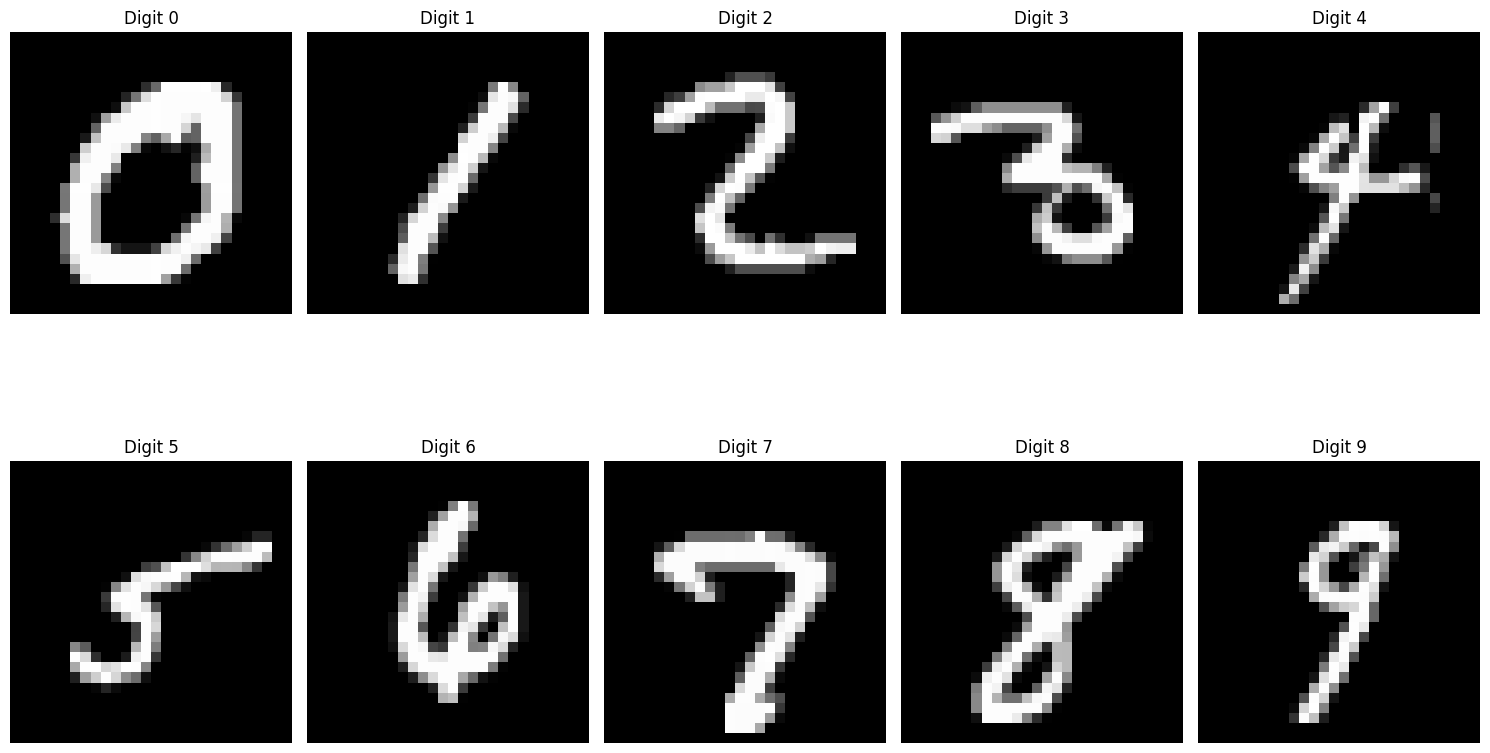

In [56]:
import matplotlib.pyplot as plt

# Number of images to display per digit
num_images = 5

# Create a figure with 2 rows and 5 columns for the 10 digits
fig, axs = plt.subplots(2, 5, figsize=(15, 10))

# Loop through each digit from 0 to 9
for digit in range(10):
    # Determine the row and column in the subplot grid
    row = digit // 5
    col = digit % 5

    # Plot the first num_images images of each digit in the corresponding subplot
    for ii in range(num_images):
        axs[row, col].imshow(digit_arrays[digit][ii, :, :], cmap='gray')
        axs[row, col].set_title(f'Digit {digit}')
        axs[row, col].axis('off')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()


In [57]:
import numpy as np

# Initialize a dictionary to hold the sum of non-zero pixels for each digit
non_zero_sums = {}

# Loop through each digit from 0 to 9
for digit in range(10):
    # Threshold the images to create a boolean array where non-zero pixels are True (1)
    thresholded_images = digit_arrays[digit] > 0

    # Compute the sum of non-zero pixels along the height and width dimensions
    non_zero_sum = np.sum(thresholded_images, (1, 2))

    # Store the result in the dictionary with the digit as the key
    non_zero_sums[digit] = non_zero_sum

# Print the non-zero pixel sums for each digit
for digit, sums in non_zero_sums.items():
    print(f"Digit {digit}: {sums}")


Digit 0: [176 198 183 ... 174 204 197]
Digit 1: [96 93 68 ... 76 96 74]
Digit 2: [188 150 226 ... 167 198 149]
Digit 3: [200 155 201 ... 200 158 151]
Digit 4: [120 130 192 ... 139 133  87]
Digit 5: [166  91  98 ... 112 106 136]
Digit 6: [168 107 120 ... 152 143 145]
Digit 7: [144 102 142 ... 159 104 151]
Digit 8: [161 175 162 ... 152 170 143]
Digit 9: [142 109 108 ... 132 133 119]


In [58]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )  # for every row, add up all the rows above it.
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole

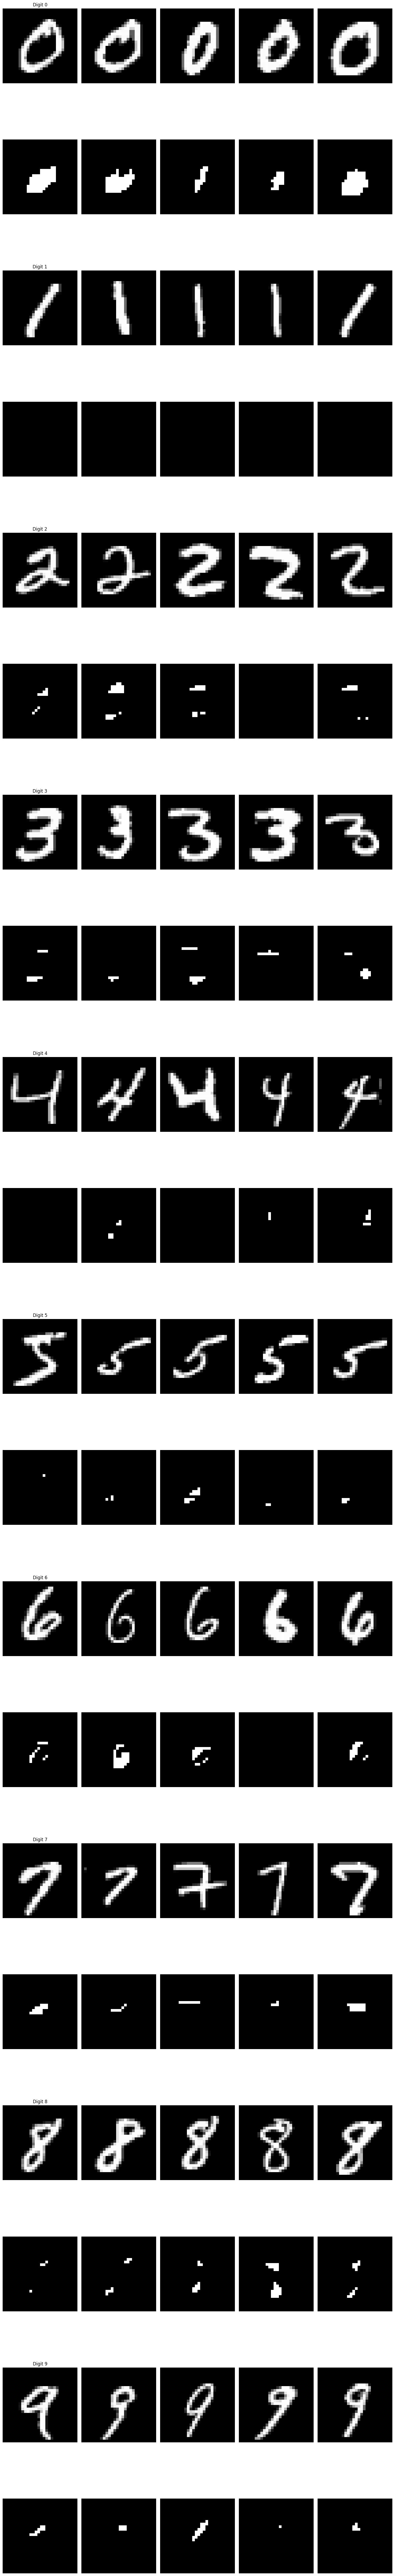

In [60]:
# Number of images to display per digit
num_images = 5

# Create a figure with 2 rows and 5 columns for each digit
fig, axs = plt.subplots(len(digit_arrays) * 2, num_images, figsize=(15, 2 * len(digit_arrays) * num_images))

# Iterate over each digit
for digit in digit_arrays:
    images = digit_arrays[digit]
    for ii in range(num_images):
        # Display original images for the current digit
        axs[digit * 2, ii].imshow(images[ii, :, :], cmap='gray')
        axs[digit * 2, ii].set_title(f'Digit {digit}' if ii == 0 else "")
        axs[digit * 2, ii].axis('off')

        # Display hole-filled images for the current digit
        axs[digit * 2 + 1, ii].imshow(getHolePixels(images[ii, :, :]), cmap='gray')
        axs[digit * 2 + 1, ii].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


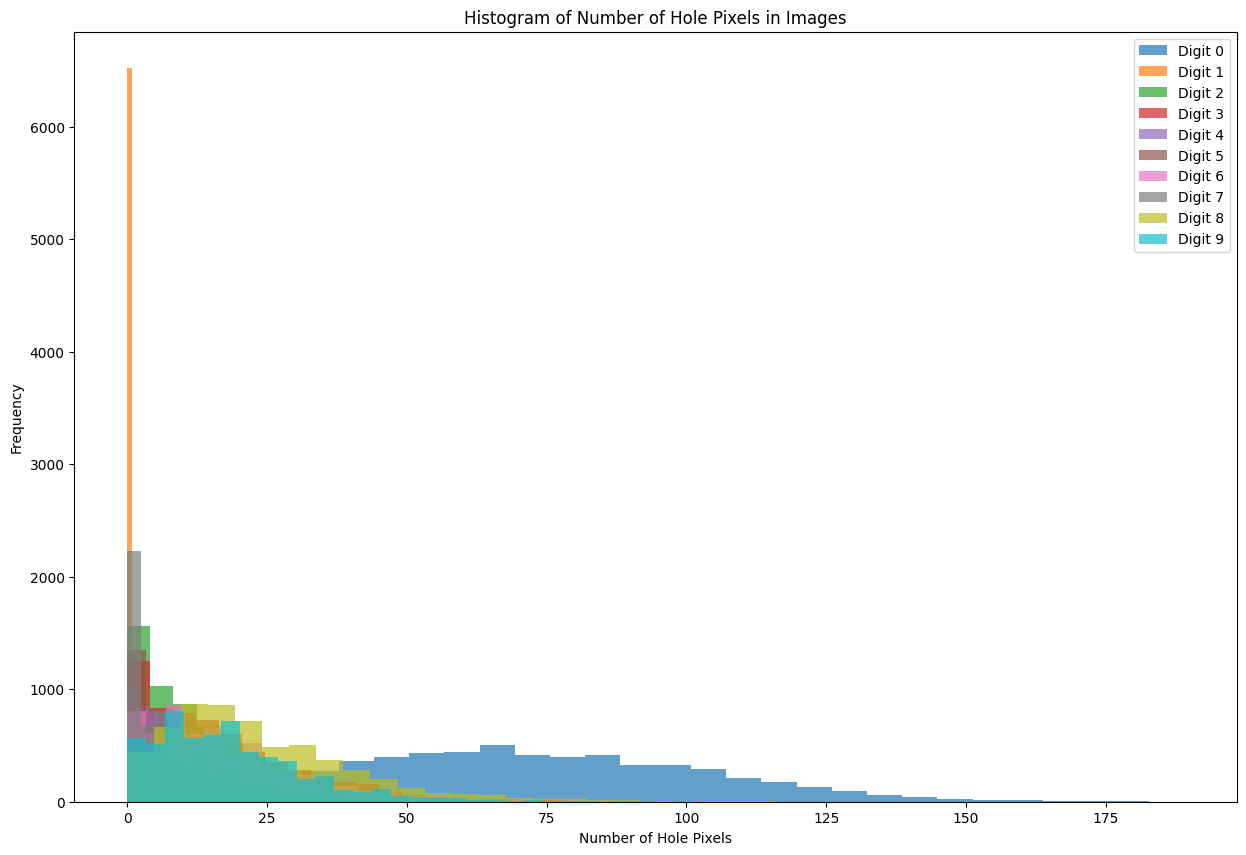

In [61]:
# Compute number of hole pixels for each digit
hole_counts = {}
for digit in digit_arrays:
    hole_counts[digit] = np.array([getHolePixels(img).sum() for img in digit_arrays[digit]])

# Plot histograms for all digits
plt.figure(figsize=(15, 10))
for digit in range(10):
    plt.hist(hole_counts[digit], bins=30, alpha=0.7, label=f'Digit {digit}')

plt.xlabel('Number of Hole Pixels')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Hole Pixels in Images')
plt.legend()
plt.show()

In [62]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull

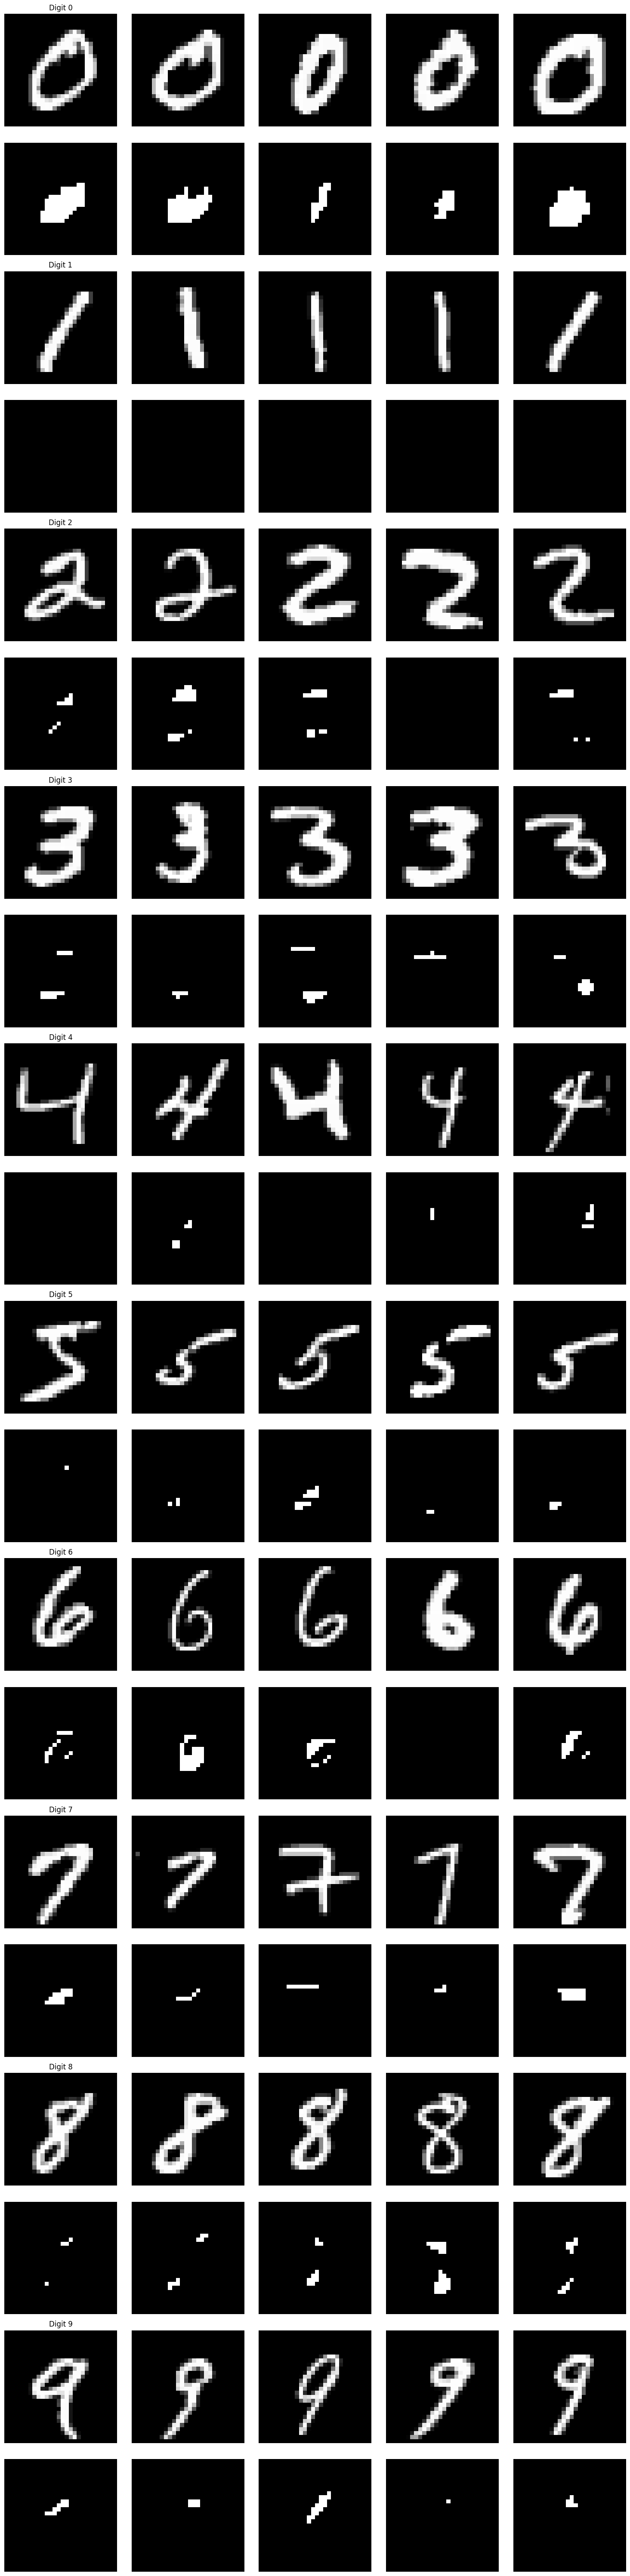

In [63]:
# Create a figure with 2 rows (original and hole-filled) and 5 columns per digit
fig, axs = plt.subplots(len(digit_arrays) * 2, num_images, figsize=(15, len(digit_arrays) * 2 * 3))

# Iterate over each digit
for digit in digit_arrays:
    images = digit_arrays[digit]
    img_ids = list(range(num_images))  # Select first num_images images

    for ii in range(num_images):
        # Display original images for the current digit
        axs[digit * 2, ii].imshow(images[ii, :, :], cmap='gray')
        axs[digit * 2, ii].set_title(f'Digit {digit}' if ii == 0 else "")
        axs[digit * 2, ii].axis('off')

        # Display hole-filled images for the current digit
        axs[digit * 2 + 1, ii].imshow(getHolePixels(images[ii, :, :]), cmap='gray')
        axs[digit * 2 + 1, ii].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

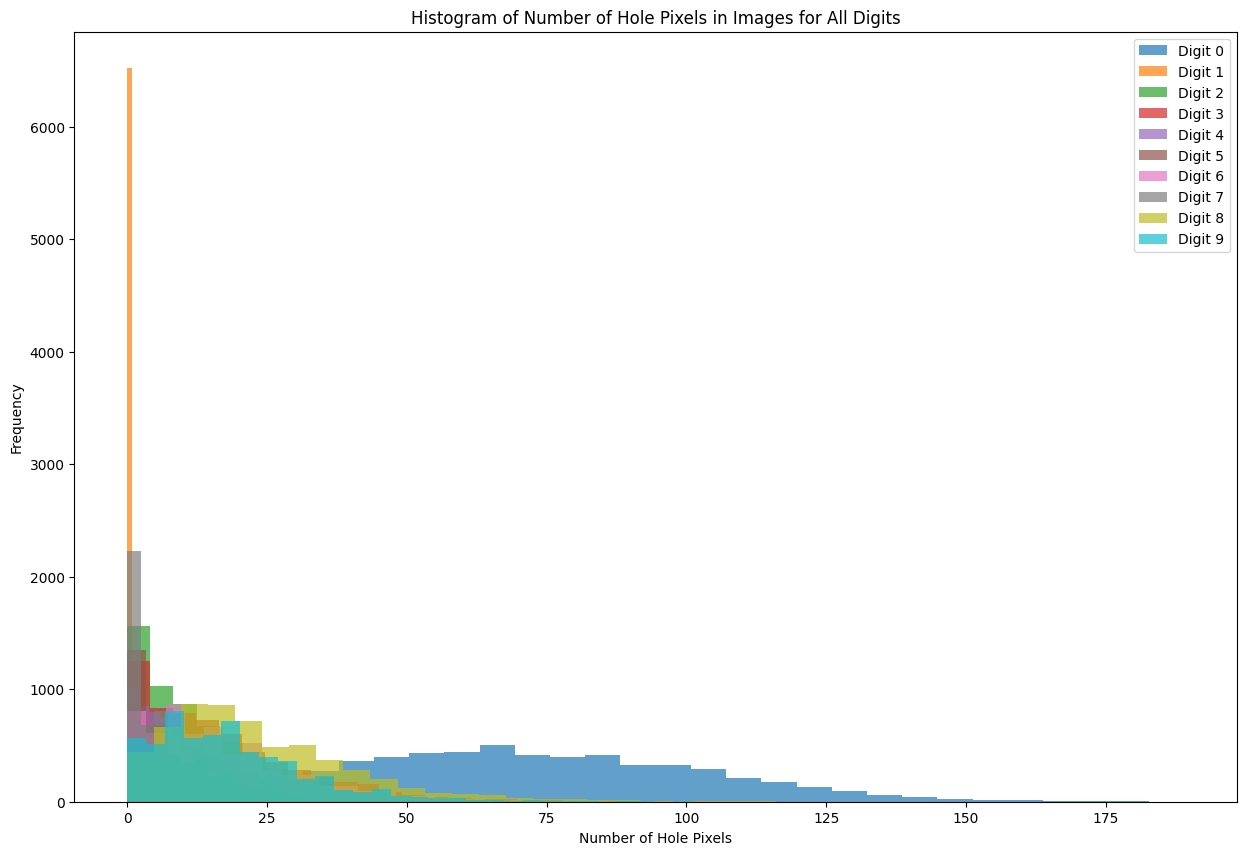

In [64]:
# Plot histograms for all digits
plt.figure(figsize=(15, 10))
for digit in range(10):
    plt.hist(hole_counts[digit], bins=30, alpha=0.7, label=f'Digit {digit}')

plt.xlabel('Number of Hole Pixels')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Hole Pixels in Images for All Digits')
plt.legend()
plt.show()

In [65]:
def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

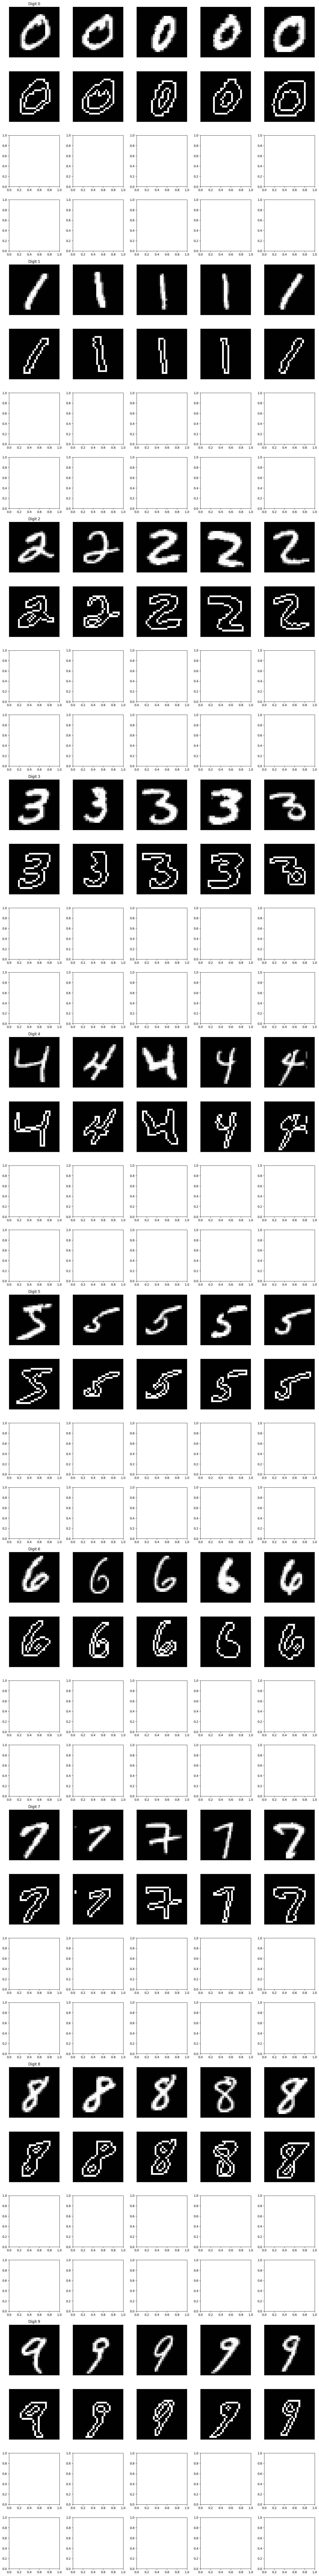

In [66]:
# Create a figure with 4 rows (original and boundary images) and num_images columns for each digit
fig, axs = plt.subplots(len(digit_arrays) * 4, num_images, figsize=(15, len(digit_arrays) * 4 * 3))

# Iterate over each digit
for digit in digit_arrays:
    images = digit_arrays[digit]
    img_ids = list(range(num_images))  # Select first num_images images

    for ii in range(num_images):
        # Display original images for the current digit
        axs[digit * 4, ii].imshow(images[ii, :, :], cmap='gray')
        axs[digit * 4, ii].set_title(f'Digit {digit}' if ii == 0 else "")
        axs[digit * 4, ii].axis('off')

        # Display boundary pixels for the current digit
        axs[digit * 4 + 1, ii].imshow(getBoundaryPixels(images[ii, :, :]), cmap='gray')
        axs[digit * 4 + 1, ii].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

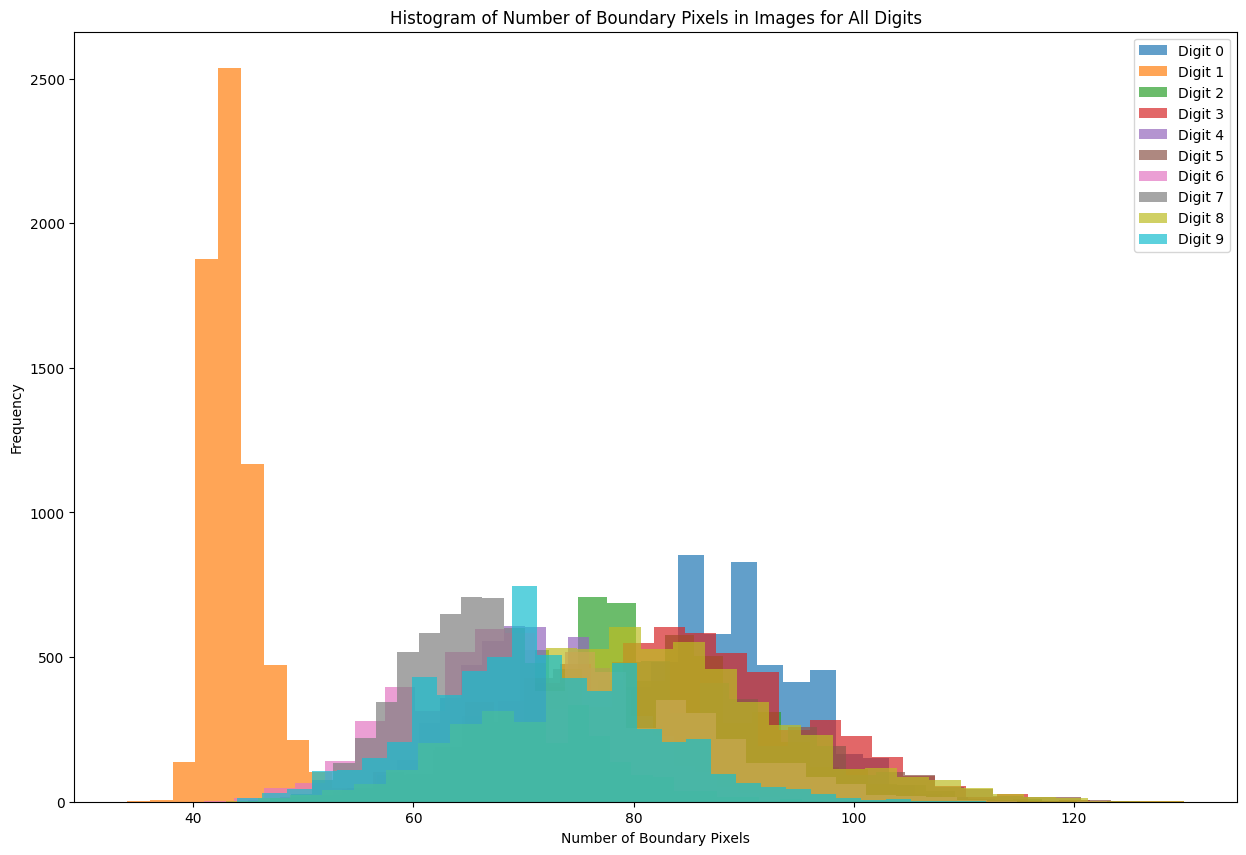

In [67]:
# Compute the number of boundary pixels for each digit
boundary_counts = {}
for digit in digit_arrays:
    boundary_counts[digit] = np.array([getBoundaryPixels(img).sum() for img in digit_arrays[digit]])

# Plot histograms for all digits
plt.figure(figsize=(15, 10))
for digit in range(10):
    plt.hist(boundary_counts[digit], bins=30, alpha=0.7, label=f'Digit {digit}')

plt.xlabel('Number of Boundary Pixels')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Boundary Pixels in Images for All Digits')
plt.legend()
plt.show()

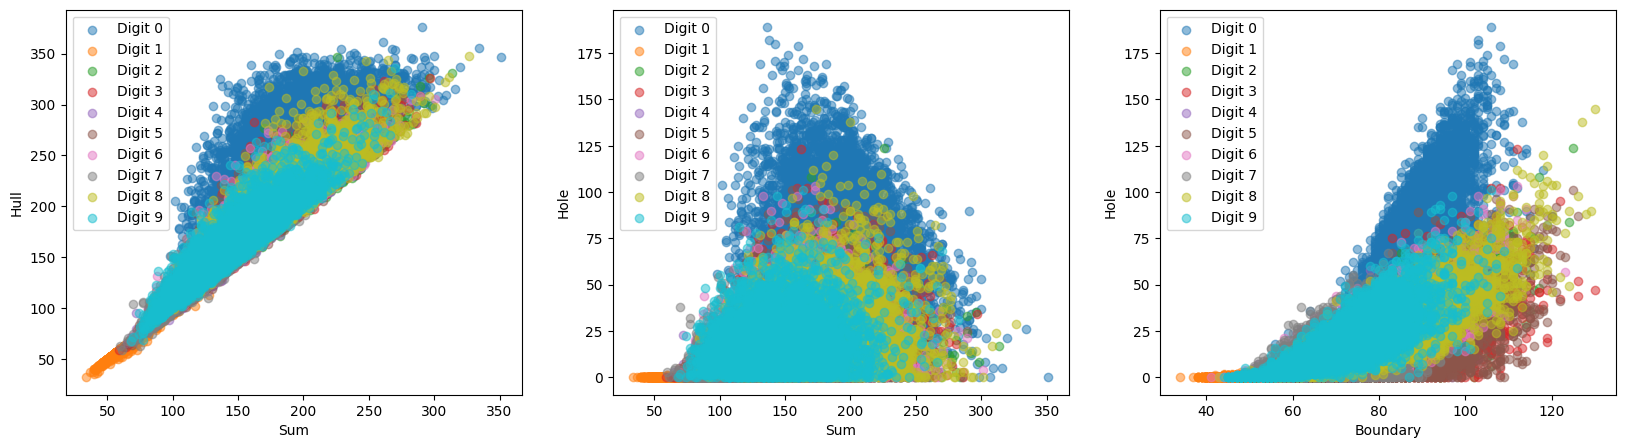

In [68]:
# Dictionary to hold images and metrics for digits 0 to 9
metrics = {digit: {'sum': [], 'hull': [], 'hole': [], 'boundary': []} for digit in range(10)}

# Loop through each digit to calculate metrics
for digit in range(10):
    images = train_X[train_y == digit, :, :]

    sum_pixels = np.array([np.sum(img > 0) for img in images])
    hull_pixels = np.array([getHullPixels(img).sum() for img in images])
    hole_pixels = np.array([getHolePixels(img).sum() for img in images])
    boundary_pixels = np.array([getBoundaryPixels(img).sum() for img in images])

    metrics[digit]['sum'] = sum_pixels
    metrics[digit]['hull'] = hull_pixels
    metrics[digit]['hole'] = hole_pixels
    metrics[digit]['boundary'] = boundary_pixels

# Create subplots for scatter plots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plot for sum vs hull
for digit in range(10):
    axs[0].scatter(metrics[digit]['sum'], metrics[digit]['hull'], alpha=0.5, label=f'Digit {digit}')
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(loc='best')

# Scatter plot for sum vs hole
for digit in range(10):
    axs[1].scatter(metrics[digit]['sum'], metrics[digit]['hole'], alpha=0.5, label=f'Digit {digit}')
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend(loc='best')

# Scatter plot for boundary vs hole
for digit in range(10):
    axs[2].scatter(metrics[digit]['boundary'], metrics[digit]['hole'], alpha=0.5, label=f'Digit {digit}')
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(loc='best')

plt.show()


In [69]:
import pandas as pd
import numpy as np
import plotly.express as px

# Prepare data
hole = []
sum_vals = []
boundary = []
labels = []

# Loop through each digit from 0 to 9
for digit in range(10):
    # Extract metrics for the current digit
    hole_digit = np.array([getHolePixels(img).sum() for img in train_X[train_y == digit, :, :]])
    sum_digit = np.array([np.sum(img > 0) for img in train_X[train_y == digit, :, :]])
    boundary_digit = np.array([getBoundaryPixels(img).sum() for img in train_X[train_y == digit, :, :]])

    # Append metrics to the lists
    hole.extend(hole_digit)
    sum_vals.extend(sum_digit)
    boundary.extend(boundary_digit)
    labels.extend([f'class {digit}'] * len(hole_digit))

# Create a DataFrame
df = pd.DataFrame({
    'Hole': hole,
    'Sum': sum_vals,
    'Boundary': boundary,
    'Class': labels
})

# Create 3D scatter plot
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary", color="Class", opacity=0.5,
                    title='3D Scatter Plot of Digit Metrics')
fig.show()
